## Решение
### Почему в задаче спрашиваются именно такие интервалы и значения?
* $ P(Sn≤5) $: Это стандартная задача на биномиальное распределение, где нас интересует вероятность того, что количество успехов не превысит определенного значения.
* $  P(S_n \in [n/2 -\sqrt{npq}, n/2 + \sqrt{npq}]) $: Этот интервал выбран, так как вокруг среднего значения np биномиального распределения стандартное отклонение равно √npq. 
Таким образом, этот интервал включает в себя большую часть вероятностной массы распределения для больших n, и мы можем ожидать, что вероятность попадания в этот интервал будет высока.
* Максимальная вероятность вида $  P(S_n = k)  $ означает, что из всех возможных значений
k (от 0 до n) нужно найти то, которое максимизирует вероятность  $  P(S_n = k) $. 


В этом варианте решения точные вероятности рассчитываются с использованием биномиального распределения, а приближенные - с использованием нормального распределения и распределения Пуассона. Оно наиболее точно когда n велико, а p мало, эта гипотеза подтвердится результатами. С помощью binom.cdf() (выбран метод cdf - cumulative distribution function, так как нам необходимо узнать вероятность того, что случайная величина примет значение, меньшее или равное указанному.)

In [10]:
from scipy.stats import binom, poisson
import numpy as np

n_values = [100, 1000, 10000]
p_values = [0.001, 0.01, 0.1, 0.25, 0.5]

results = []

for n in n_values:
    for p in p_values:
        q = 1 - p
        interval = [n / 2 - np.sqrt(n * p * q), n / 2 + np.sqrt(n * p * q)]
        exact_interval_prob = binom.cdf(interval[1], n, p) - binom.cdf(interval[0], n, p)
        exact_leq_5_prob = binom.cdf(5, n, p)
        max_prob = max(binom.pmf(k, n, p) for k in range(n+1))
        
        poisson_mean = n * p
        approx_interval_prob = poisson.cdf(interval[1], poisson_mean) - poisson.cdf(interval[0], poisson_mean)
        approx_leq_5_prob = poisson.cdf(5, poisson_mean)
        max_approx_prob = max(poisson.pmf(k, poisson_mean) for k in range(n+1))
        
        results.append({
            "n": n,
            "p": p,
            "exact_interval": exact_interval_prob,
            "exact_leq_5": exact_leq_5_prob,
            "max_exact_prob": max_prob,
            "approx_interval": approx_interval_prob,
            "approx_leq_5": approx_leq_5_prob,
            "max_approx_prob": max_approx_prob
        })

for result in results:
    print(f"n = {result['n']}, p = {result['p']}")
    print(f"Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): {result['exact_interval']}")
    print(f"Приближенная P(Sn ∈ [n/2 −√npq, n/2 + √npq]) (Poisson): {result['approx_interval']}")
    print(f"Точная P(Sn ⩽ 5): {result['exact_leq_5']}")
    print(f"Приближенная P(Sn ⩽ 5) (Poisson): {result['approx_leq_5']}")
    print(f"Max точная P(Sn = k): {result['max_exact_prob']}")
    print(f"Max приближенная P(Sn = k) (Poisson): {result['max_approx_prob']}")
    print('_' * 50)

n = 100, p = 0.001
Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): 0.0
Approx P(Sn ∈ [n/2 −√npq, n/2 + √npq]) (Poisson): 0.0
Exact P(Sn ⩽ 5): 0.9999999989001895
Approx P(Sn ⩽ 5) (Poisson): 0.9999999987251013
Max Exact P(Sn = k): 0.9047921471137097
Max Approx P(Sn = k) (Poisson): 0.9048374180359595
__________________________________________________
n = 100, p = 0.01
Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): 0.0
Approx P(Sn ∈ [n/2 −√npq, n/2 + √npq]) (Poisson): 0.0
Exact P(Sn ⩽ 5): 0.999465465536007
Approx P(Sn ⩽ 5) (Poisson): 0.9994058151824183
Max Exact P(Sn = k): 0.36972963764972666
Max Approx P(Sn = k) (Poisson): 0.36787944117144233
__________________________________________________
n = 100, p = 0.1
Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): 0.0
Approx P(Sn ∈ [n/2 −√npq, n/2 + √npq]) (Poisson): 0.0
Exact P(Sn ⩽ 5): 0.057576886487034094
Approx P(Sn ⩽ 5) (Poisson): 0.06708596287903189
Max Exact P(Sn = k): 0.13186534682448792
Max Approx P(Sn = k) (Poisson): 0.12511003572113372
______________________

В этом варианте решения рассмотрим вычисление приближенных вероятностей с использованием локальной теоремы Муавра-Лапласа ($ P(X = k) \approx \frac{1}{\sqrt{2\pi npq}} \cdot e^{-\frac{(k - np)^2}{2npq}}
$). 

Хотя она используется для приближенного вычисления вероятности конкретного числа успехов в схеме Бернулли, однако, её также можно использовать для вычисления вероятности того, что число успехов попадет в определенный интервал, суммируя вероятности для каждого значения в интервале.

In [12]:
import numpy as np
from math import sqrt, exp, pi

def moivre_laplace(n, p, k):
    q = 1 - p
    return 1 / sqrt(2 * pi * n * p * q) * exp(-((k - n * p) ** 2) / (2 * n * p * q))

n_values = [100, 1000, 10000]
p_values = [0.001, 0.01, 0.1, 0.25, 0.5]

results = []

for n in n_values:
    for p in p_values:
        q = 1 - p
        
        interval = [n / 2 - np.sqrt(n * p * q), n / 2 + np.sqrt(n * p * q)]
        exact_interval_prob = binom.cdf(interval[1], n, p) - binom.cdf(interval[0], n, p)
        exact_leq_5_prob = binom.cdf(5, n, p)
        max_prob = max(binom.pmf(k, n, p) for k in range(n+1))

        # 1. P(Sn in [n/2 - sqrt(npq), n/2 + sqrt(npq)])
        lower_bound = int(n / 2 - sqrt(n * p * q))
        upper_bound = int(n / 2 + sqrt(n * p * q))
        prob_interval = sum(moivre_laplace(n, p, k) for k in range(lower_bound, upper_bound + 1))
        
        # 2. P(Sn <= 5)
        prob_leq_5 = sum(moivre_laplace(n, p, k) for k in range(6))
        
        # 3. Max P(Sn = k)
        max_prob = max(moivre_laplace(n, p, k) for k in range(n + 1))
        
        results.append({
            "n": n,
            "p": p,
            "exact_interval": exact_interval_prob,
            "exact_leq_5": exact_leq_5_prob,
            "max_exact_prob": max_prob,
            "prob_interval": prob_interval,
            "prob_leq_5": prob_leq_5,
            "max_prob": max_prob
        })

for result in results:
    print(f"n = {result['n']}, p = {result['p']}")
    print(f"Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): {result['exact_interval']}")
    print(f"Приближенная P(Sn ∈ [n/2 −√npq, n/2 + √npq]) ≈ {result['prob_interval']}")
    print(f"Точная P(Sn ⩽ 5): {result['exact_leq_5']}")
    print(f"Приближенная P(Sn ⩽ 5) ≈ {result['prob_leq_5']}")
    print(f"Max точная P(Sn = k): {result['max_exact_prob']}")
    print(f"Max приближенная P(Sn = k) ≈ {result['max_prob']}")
    print('_' * 50)

n = 100, p = 0.001
Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): 0.0
Приближенная P(Sn ∈ [n/2 −√npq, n/2 + √npq]) ≈ 0.0
Точная P(Sn ⩽ 5): 0.9999999989001895
Приближенная P(Sn ⩽ 5) ≈ 1.222480853594572
Max точная P(Sn = k): 1.2005793277351
Max приближенная P(Sn = k) ≈ 1.2005793277351
__________________________________________________
n = 100, p = 0.01
Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): 0.0
Приближенная P(Sn ∈ [n/2 −√npq, n/2 + √npq]) ≈ 0.0
Точная P(Sn ⩽ 5): 0.999465465536007
Приближенная P(Sn ⩽ 5) ≈ 0.9424393138986122
Max точная P(Sn = k): 0.40095207790918386
Max приближенная P(Sn = k) ≈ 0.40095207790918386
__________________________________________________
n = 100, p = 0.1
Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): 0.0
Приближенная P(Sn ∈ [n/2 −√npq, n/2 + √npq]) ≈ 1.2590860811983577e-34
Точная P(Sn ⩽ 5): 0.057576886487034094
Приближенная P(Sn ⩽ 5) ≈ 0.06568670261055759
Max точная P(Sn = k): 0.13298076013381088
Max приближенная P(Sn = k) ≈ 0.13298076013381088
_______________________________

В этом варианте решения рассмотрим вычисление приближенных вероятностей с использованием интегральной теоремы Муавра-Лапласа.

In [4]:
import numpy as np
from scipy.integrate import quad
from scipy.stats import binom

# Функция плотности вероятности стандартного нормального распределения
def f(t):
    return (1/np.sqrt(2*np.pi)) * np.exp(-t**2 / 2)

# Функция для вычисления функции распределения стандартного нормального распределения
def F(x):
    result, _ = quad(f, -np.inf, x)
    return result

n_values = [100, 1000, 10000]
p_values = [0.001, 0.01, 0.1, 0.25, 0.5]

results = []

for n in n_values:
    for p in p_values:
        q = 1 - p
        
        interval = [n / 2 - np.sqrt(n * p * q), n / 2 + np.sqrt(n * p * q)]
        exact_interval_prob = binom.cdf(interval[1], n, p) - binom.cdf(interval[0], n, p)
        exact_leq_5_prob = binom.cdf(5, n, p)
        max_prob = max(binom.pmf(k, n, p) for k in range(n+1))
        
        # 1. P(Sn in [n/2 - sqrt(npq), n/2 + sqrt(npq)])
        lower_bound = (n / 2 - np.sqrt(n * p * q) - n * p) / np.sqrt(n * p * q)
        upper_bound = (n / 2 + np.sqrt(n * p * q) - n * p) / np.sqrt(n * p * q)
        prob_interval = F(upper_bound) - F(lower_bound)
        
        # 2. P(Sn <= 5)
        prob_leq_5 = F((5 - n * p) / np.sqrt(n * p * q))
        
        # 3. Max P(Sn = k)
        max_k = round(n * p)
        prob_max_k = f((max_k - n * p) / np.sqrt(n * p * q)) / np.sqrt(n * p * q)
        
        results.append({
            "n": n,
            "p": p,
            "exact_interval": exact_interval_prob,
            "exact_leq_5": exact_leq_5_prob,
            "max_exact_prob": max_prob,
            "prob_interval": prob_interval,
            "prob_leq_5": prob_leq_5,
            "max_prob": prob_max_k
        })

for result in results:
    print(f"n = {result['n']}, p = {result['p']}")
    print(f"Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): {result['exact_interval']}")
    print(f"Приближенная P(Sn ∈ [n/2 −√npq, n/2 + √npq]) ≈ {result['prob_interval']}")
    print(f"Точная P(Sn ⩽ 5): {result['exact_leq_5']}")
    print(f"Приближенная P(Sn ⩽ 5) ≈ {result['prob_leq_5']}")
    print(f"Max точная P(Sn = k): {result['max_exact_prob']}")
    print(f"Max приближенная P(Sn = k) ≈ {result['max_prob']}")
    print('_' * 50)


n = 100, p = 0.001
Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): 0.0
Приближенная P(Sn ∈ [n/2 −√npq, n/2 + √npq]) ≈ 0.0
Точная P(Sn ⩽ 5): 0.9999999989001895
Приближенная P(Sn ⩽ 5) ≈ 1.0
Max точная P(Sn = k): 0.9047921471137097
Max приближенная P(Sn = k) ≈ 1.2005793277351
--------------------------------------------------
n = 100, p = 0.01
Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): 0.0
Приближенная P(Sn ∈ [n/2 −√npq, n/2 + √npq]) ≈ -1.3878555876353912e-83
Точная P(Sn ⩽ 5): 0.999465465536007
Приближенная P(Sn ⩽ 5) ≈ 0.999970919606792
Max точная P(Sn = k): 0.36972963764972666
Max приближенная P(Sn = k) ≈ 0.4009520779091839
--------------------------------------------------
n = 100, p = 0.1
Точная P(Sn ∈ [n/2 −√npq, n/2 + √npq]): 0.0
Приближенная P(Sn ∈ [n/2 −√npq, n/2 + √npq]) ≈ 1.1102230246251565e-16
Точная P(Sn ⩽ 5): 0.057576886487034094
Приближенная P(Sn ⩽ 5) ≈ 0.0477903522728147
Max точная P(Sn = k): 0.13186534682448792
Max приближенная P(Sn = k) ≈ 0.1329807601338109
--------------------------

Интегральная теорема Муавра-Лапласа оказалась самой точной из остальных аппроксимаций в целом. Наибольшей точности достигает при параметрах n = 10000, p = 0.5, а именно 6 знаков после запятой, так как для максимизации её точности нужно большое число испытаний и вероятности  успеха p и неудачи q не слишком близки к 0 и 1. Наименьшая точность при n = 100, p = 0.001, так как вероятность и количество испытаний слишком малы (особенно заметны различия в максимальных вероятностях)
* При n = 100, p = 0.001 точная и приближенная вероятности попадания в интервал  $ P(S_n \in [n/2 -\sqrt{npq}, n/2 + \sqrt{npq}]) $ равны 0, так как вероятность p настолько мала, что значительное количество успехов маловероятно.

* При n = 100, p = 0.1 вышла ситуация: 
Точная $ P(S_n \in [n/2 -\sqrt{npq}, n/2 + \sqrt{npq}]) $: 0.0 Приближенная $ P(S_n \in [n/2 -\sqrt{npq}, n/2 + \sqrt{npq}]) $ ≈ 1.1102230246251565e-16. Дело в том, что среднее значение $ \mu $ биномиального распределения np равно 10, а стандартное отклонение $\sigma$ равно $\sqrt{npq} = \sqrt{9} = 3$. Интервал $[n/2 -\sqrt{npq}, n/2 + \sqrt{npq}]$ в этом случае превращается в $[50-3, 50+3]$ = $[47, 53]$. Этот интервал далек от среднего значения распределения (которое равно 10), и поэтому вероятность того, что случайная величина попадет в этот интервал, равна 0 по биномиальному распределению.
Однако при использовании интегральной теоремы Муавра-Лапласа возможно получить ненулевое значение, хотя и очень маленькое. Это связано с тем, что нормальное распределение простирается на бесконечность в обе стороны, и даже далеко от среднего значения есть ненулевая вероятность.

## Графическое представление распределений

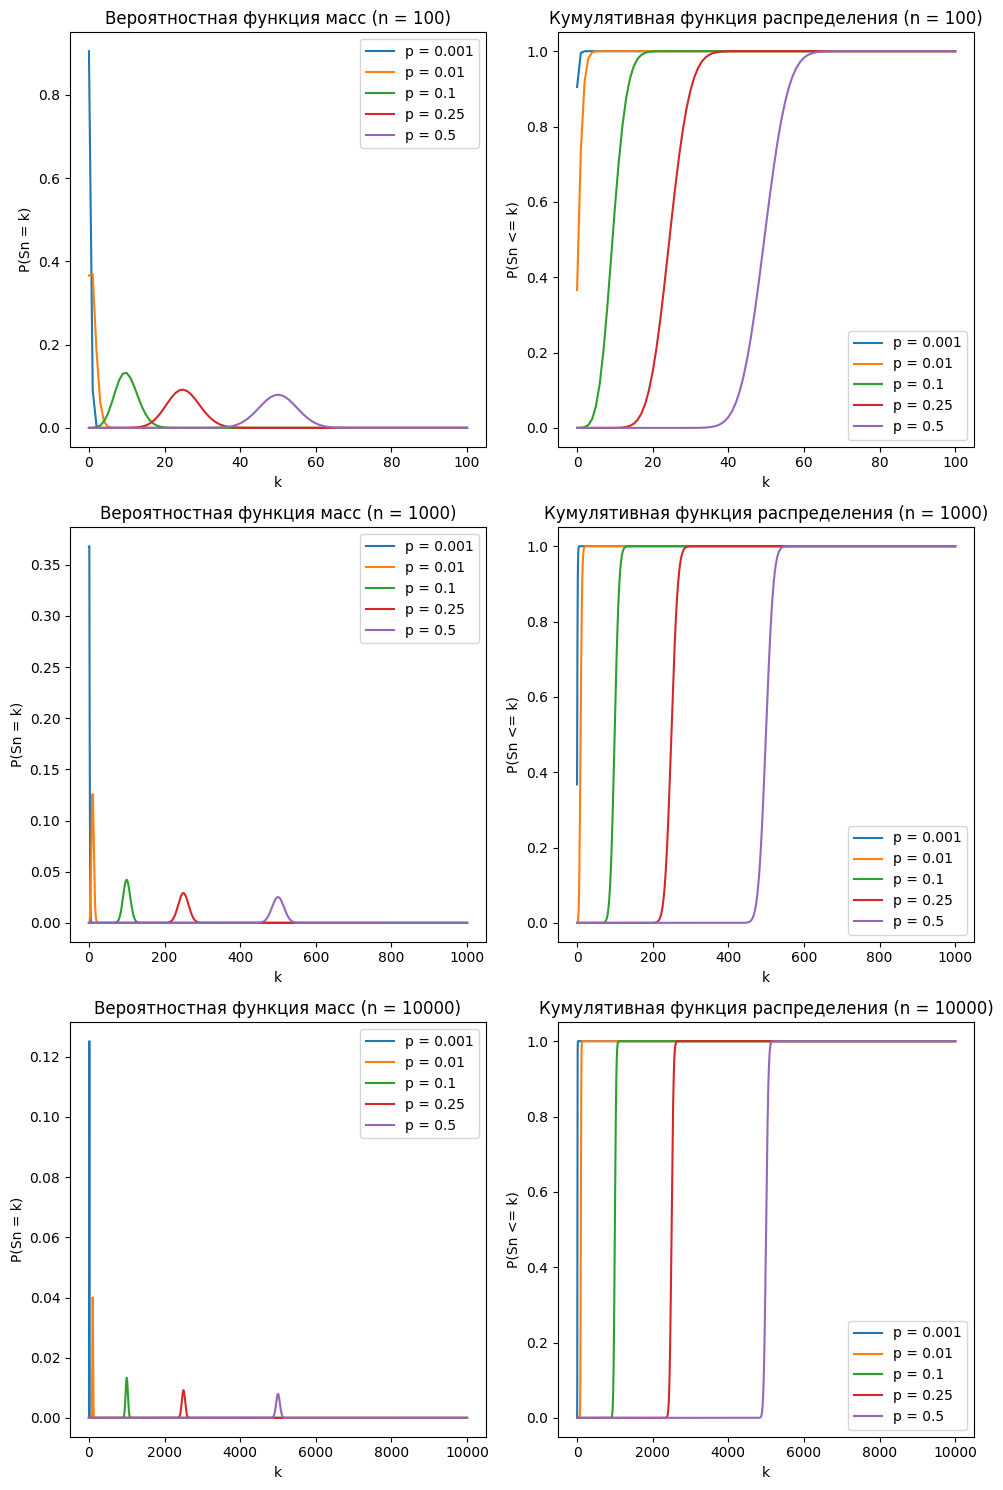

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n_values = [100, 1000, 10000]
p_values = [0.001, 0.01, 0.1, 0.25, 0.5]

fig, axs = plt.subplots(len(n_values), 2, figsize=(10, 5 * len(n_values)))

for i, n in enumerate(n_values):
    for p in p_values:
        x = np.arange(0, n+1)
        pmf = binom.pmf(x, n, p)
        cdf = binom.cdf(x, n, p)
        
        axs[i, 0].plot(x, pmf, label=f'p = {p}')
        axs[i, 1].plot(x, cdf, label=f'p = {p}')
    
    axs[i, 0].set_title(f'Вероятностная функция масс (n = {n})')
    axs[i, 0].set_xlabel('k')
    axs[i, 0].set_ylabel('P(Sn = k)')
    axs[i, 0].legend()
    
    axs[i, 1].set_title(f'Кумулятивная функция распределения (n = {n})')
    axs[i, 1].set_xlabel('k')
    axs[i, 1].set_ylabel('P(Sn <= k)')
    axs[i, 1].legend()

plt.tight_layout()
plt.show()

На графиках слева отображается функция вероятности, которая показывает вероятность того, что случайная величина примет конкретное значение. На графиках справа показана функция распределения, которая демонстрирует вероятность того, что случайная величина примет значение, меньшее или равное данному. В каждом случае построены графики для разных значений $ p $ при фиксированном $ n $. 

Здесь легко можно увидеть значения максимальных вероятностей, на cdf заметно, что с увеличением $n$ график функции вероятности становится всё менее плавным в экстремумах, а также то, что при $p = 0.5$ $n $ тоже равен половине из всех испытаний, при $p = 0.25$ - четверти и так далее. Это связано с увеличением точности и демонстрирует действие закона больших чисел (при большом числе испытаний доля успехов приблизительно равняется вероятности успеха).
Пик графика pmf при $p = 0.5$ находится посеридине, при $p < 0.5$ сместится влево, при $p > 0.5$ - вправо. Максимальное значение уменьшается по мере увеличения $n$. Для меньших значений $n$ график может иметь более выраженные пики. Причиной служит увеличение исходов (иначе - уменьшению максимальной вероятности отдельного исхода) и сглаживание распределения, т.е. помере увеличения n биномиальное распределение приближается к нормальному распределению, и его график становится более сглаженным.